In [1]:
!pip install d2l==1.0.0-beta0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.7 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616822 sha256=124ca3ff0d4a59dbf8622ec8fb64a5066946bbdc6395df4ff15019592aa39e14
  Stored in directory: /root/.cache/pip/wheels/b3/50/6c/0a82c1358b4da2dbd9c1bb17e0f89467db32812ab236dbf6d5
Successfully built gym
  Attempting uninsta

Các phần trước đã giới thiệu cho chúng ta về thiết kế mạng hiện đại cho thị giác máy tính. Điểm chung của tất cả các công việc chúng ta đề cập là nó phụ thuộc rất nhiều vào trực giác của các nhà khoa học. Nhiều kiến ​​trúc được cung cấp thông tin rất nhiều bởi sự sáng tạo của con người và ở mức độ thấp hơn nhiều bởi sự khám phá có hệ thống về không gian thiết kế mà các mạng sâu cung cấp. Tuy nhiên, phương pháp kỹ thuật mạng này đã rất thành công.

Kể từ khi AlexNet ( Phần 8.1 ) đánh bại các mô hình thị giác máy tính thông thường trên ImageNet, việc xây dựng các mạng rất sâu bằng cách xếp chồng các khối phức hợp, tất cả được thiết kế theo cùng một mẫu đã trở nên phổ biến. Đặc biệt, $3 \times 3$ tích chập đã được phổ biến bởi các mạng VGG ( Mục 8.2 ). NiN ( Mục 8.3 ) cho thấy rằng thậm chí $1 \times 1$ tích chập có thể có lợi bằng cách thêm các điểm phi tuyến cục bộ. Hơn nữa, NiN đã giải quyết vấn đề tổng hợp thông tin ở đầu mạng bằng cách tổng hợp trên tất cả các vị trí. GoogLeNet ( Mục 8.4 ) đã thêm nhiều nhánh có chiều rộng tích chập khác nhau, kết hợp các ưu điểm của VGG và NiN trong khối Inception của nó. ResNets ( Mục 8.6 ) đã thay đổi xu hướng quy nạp đối với ánh xạ nhận dạng (từ $f(x) = 0$). Điều này cho phép các mạng rất sâu. Gần một thập kỷ sau, thiết kế ResNet vẫn phổ biến, một minh chứng cho thiết kế của nó. Cuối cùng, ResNeXt ( Mục 8.6.5 ) đã thêm các tích chập được nhóm lại, mang lại sự đánh đổi tốt hơn giữa các tham số và tính toán. Tiền thân của Máy biến áp cho tầm nhìn, Mạng Bóp và Kích thích (SENets) cho phép truyền thông tin hiệu quả giữa các địa điểm ( Hu et al. , 2018 ) . Họ đã hoàn thành điều này bằng cách tính toán chức năng chú ý toàn cầu trên mỗi kênh.

Cho đến nay, chúng tôi đã bỏ qua các mạng thu được thông qua tìm kiếm kiến ​​trúc thần kinh (NAS) ( Liu và cộng sự , 2018 , Zoph và Le, 2016 ) . Chúng tôi đã chọn làm như vậy vì chi phí của chúng thường rất lớn, dựa vào tìm kiếm vũ phu, thuật toán di truyền, học tăng cường hoặc một số hình thức tối ưu hóa siêu tham số khác. Với một không gian tìm kiếm cố định, NAS sử dụng chiến lược tìm kiếm để tự động chọn một kiến ​​trúc dựa trên ước tính hiệu suất được trả về. Kết quả của NAS là một phiên bản mạng duy nhất. EfficientNets là một kết quả đáng chú ý của tìm kiếm này ( Tan và Le, 2019 ).

Trong phần tiếp theo, chúng tôi thảo luận về một ý tưởng hoàn toàn khác với nhiệm vụ tìm kiếm một mạng tốt nhất . Nó tương đối rẻ về mặt tính toán, nó dẫn đến những hiểu biết khoa học trên đường đi và nó khá hiệu quả về chất lượng của kết quả. Hãy xem lại chiến lược của Radosavovic et al. ( 2020 ) để thiết kế không gian thiết kế mạng . Chiến lược kết hợp sức mạnh của thiết kế thủ công và NAS. Nó thực hiện điều này bằng cách vận hành trên các bản phân phối của mạng và tối ưu hóa các bản phân phối theo cách để đạt được hiệu suất tốt cho toàn bộ họ mạng. Kết quả của nó là RegNets, cụ thể là RegNetX và RegNetY, cộng với một loạt các nguyên tắc hướng dẫn để thiết kế các CNN hoạt động hiệu quả.

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

# 8.8.1. Phương pháp thiết kế không gian mạng AnyNet

Mô tả dưới đây theo sát lập luận trong Radosavovic et al. ( 2020 ) với một số từ viết tắt để phù hợp với phạm vi của cuốn sách. Để bắt đầu, chúng ta cần một mẫu cho họ mạng để khám phá. Một trong những điểm chung của các thiết kế trong chương này là các mạng bao gồm stem , body và head.. Stem thực hiện xử lý hình ảnh ban đầu, thường thông qua các kết cấu với kích thước cửa sổ lớn hơn. Phần Body bao gồm nhiều khối, thực hiện phần lớn các phép biến đổi cần thiết để chuyển từ hình ảnh thô sang biểu diễn đối tượng. Cuối cùng, phần Head chuyển đổi kết quả này thành các đầu ra mong muốn, chẳng hạn như thông qua bộ hồi quy softmax để phân loại đa lớp. Ngược lại, phần body bao gồm nhiều giai đoạn, hoạt động trên hình ảnh ở độ phân giải giảm dần. Trên thực tế, cả gốc và mỗi giai đoạn tiếp theo đều tạo ra một phần tư độ phân giải không gian. Cuối cùng, mỗi giai đoạn bao gồm một hoặc nhiều khối. Mẫu này phổ biến cho tất cả các mạng, từ VGG đến ResNeXt. Thật vậy, để thiết kế các mạng AnyNet chung, Radosavovic et al. ( 2020 ) đã sử dụng khối ResNeXt củaHình 8.6.5 .

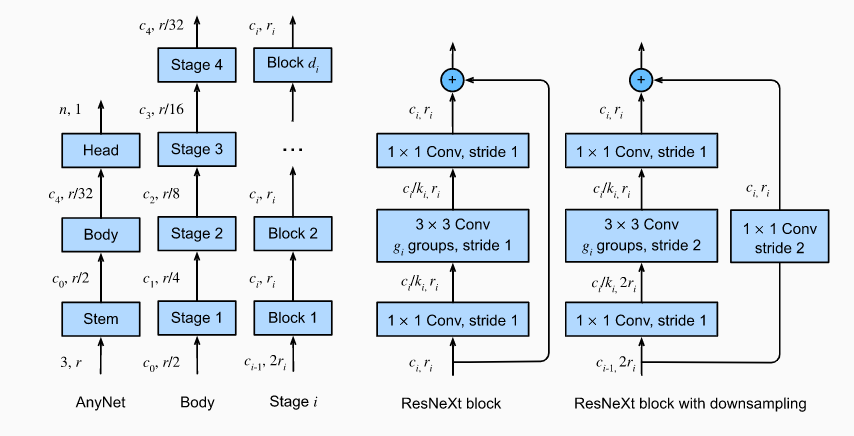

Hãy xem lại cấu trúc được nêu trong Hình trên một cách chi tiết. Như đã đề cập, AnyNet bao gồm stem, body và head. Stem lấy hình ảnh RGB đầu vào của nó (3 kênh), sử dụng $3 \times 3$ tích chập với bước tiến của $2$, theo sau là định mức hàng loạt, để giảm một nửa độ phân giải từ $r \times r$ ĐẾN $r/2 \times r/2$. Hơn nữa, nó tạo ra $c_0$ các kênh phục vụ như đầu vào cho Body.

Vì mạng được thiết kế để hoạt động tốt với hình ảnh ImageNet có dạng $224 \times 224 \times 3$, cơ thể phục vụ để giảm điều này xuống $7 \times 7 \times c_4$ qua 4 giai đoạn (nhắc lại rằng $224 / 2^{1+4} = 7$), mỗi cái có bước tiến cuối cùng là $2$. Cuối cùng, phần đầu sử dụng một thiết kế hoàn toàn tiêu chuẩn thông qua tổng hợp trung bình toàn cầu, tương tự như NiN ( Mục 8.3 ), theo sau là một lớp được kết nối đầy đủ để phát ra một vectơ $n$-chiều cho $n$-phân loại lớp.

Hầu hết các quyết định thiết kế có liên quan vốn có đối với phần thân của mạng. Quá trình này diễn ra theo từng giai đoạn, trong đó mỗi giai đoạn bao gồm cùng một loại khối ResNeXt như chúng ta đã thảo luận trong Phần 8.6.5 . Thiết kế ở đó lại hoàn toàn chung chung: chúng ta bắt đầu với một khối giảm một nửa độ phân giải bằng cách sử dụng một bước $2$ (ngoài cùng bên phải trong Hình 8.8.1 ). Để phù hợp với điều này, nhánh còn lại của khối ResNeXt cần phải đi qua một $1 \times 1$ tích chập. Khối này được theo sau bởi một số lượng khác nhau các khối ResNeXt bổ sung không thay đổi cả độ phân giải và số lượng kênh. Lưu ý rằng một phương pháp thiết kế phổ biến là thêm một nút cổ chai nhỏ trong thiết kế các khối chập. Như vậy, với tỷ lệ cổ chai $k_i \geq 1$ chúng tôi đủ khả năng một số kênh $c_i/k_i$ trong mỗi khối cho sân khấu $i$ (như các thí nghiệm cho thấy, điều này không thực sự hiệu quả và nên bỏ qua). Cuối cùng, vì chúng ta đang xử lý các khối ResNeXt, nên chúng ta cũng cần chọn số nhóm $g_i$ cho các kết cấu được nhóm ở giai đoạn $i$.

Tuy nhiên, không gian thiết kế có vẻ chung chung này cung cấp cho chúng tôi nhiều tham số: chúng tôi có thể đặt chiều rộng khối (số lượng kênh) $c_0, \ldots c_4$, độ sâu (số khối) trên mỗi giai đoạn $d_1, \ldots d_4$, tỷ lệ cổ chai $k_1, \ldots k_4$ và độ rộng của nhóm (số lượng nhóm) $g_1, \ldots g_4$. Tổng cộng, điều này bổ sung tới 17 tham số, dẫn đến số lượng cấu hình lớn bất hợp lý cần được khám phá. Chúng tôi cần một số công cụ để giảm không gian thiết kế khổng lồ này một cách hiệu quả. Đây là lúc vẻ đẹp khái niệm của không gian thiết kế xuất hiện. Trước khi làm như vậy, trước tiên hãy triển khai thiết kế chung.

In [3]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

Mỗi giai đoạn bao gồm **depth** các khối ResNeXt, trong đó num_channels chỉ định chiều rộng khối. Lưu ý rằng khối đầu tiên giảm một nửa chiều cao và chiều rộng của hình ảnh đầu vào.

In [4]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

Đặt thân, thân và đầu mạng lại với nhau, chúng ta hoàn thành việc triển khai AnyNet.

In [5]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

# 8.8.2. Phân phối và thông số của không gian thiết kế

Như vừa thảo luận trong Phần 8.8.1 , các tham số của không gian thiết kế là siêu tham số của các mạng trong không gian thiết kế đó. Xem xét vấn đề xác định các tham số tốt trong không gian thiết kế AnyNet. Chúng ta có thể thử tìm lựa chọn tham số tốt nhất cho một lượng tính toán nhất định (ví dụ: FLOP và thời gian tính toán). Nếu chúng tôi cho phép thậm chí chỉ có hai lựa chọn khả thi cho mỗi tham số, chúng tôi sẽ phải khám phá $2^{17} = 131072$ kết hợp để tìm ra giải pháp tốt nhất. Điều này rõ ràng là không khả thi do chi phí cắt cổ của nó. Tệ hơn nữa, chúng ta không thực sự học được gì từ bài tập này về cách một người nên thiết kế mạng. Lần tới khi chúng ta thêm, chẳng hạn như một giai đoạn X, hoặc một hoạt động thay đổi, hoặc tương tự, chúng ta sẽ cần phải bắt đầu lại từ đầu. Tệ hơn nữa, do tính ngẫu nhiên trong đào tạo (làm tròn, xáo trộn, lỗi bit), không có hai lần chạy nào có khả năng tạo ra kết quả giống hệt nhau. Một chiến lược tốt hơn là cố gắng xác định các nguyên tắc chung về cách các lựa chọn tham số nên liên quan với nhau như thế nào. Chẳng hạn, tỷ lệ thắt cổ chai, số lượng kênh, khối, nhóm hoặc sự thay đổi của chúng giữa các lớp nên được điều chỉnh một cách lý tưởng bởi một tập hợp các quy tắc đơn giản. Cách tiếp cận trong Radosavovic et al. ( 2019 )dựa trên bốn giả định sau:

1. Chúng tôi giả định rằng các nguyên tắc thiết kế chung thực sự tồn tại, sao cho nhiều mạng đáp ứng các yêu cầu này sẽ mang lại hiệu suất tốt. Do đó, việc xác định phân phối qua mạng có thể là một chiến lược tốt. Nói cách khác, chúng tôi cho rằng có rất nhiều cây kim tốt trong đống cỏ khô.

2. Chúng ta không cần huấn luyện các mạng để hội tụ trước khi có thể đánh giá xem một mạng có tốt hay không. Thay vào đó, chỉ cần sử dụng các kết quả trung gian làm hướng dẫn đáng tin cậy cho độ chính xác cuối cùng là đủ. Sử dụng proxy (gần đúng) để tối ưu hóa mục tiêu được gọi là tối ưu hóa đa độ chính xác ( Forrester et al. , 2007 ) . Do đó, tối ưu hóa thiết kế được thực hiện, dựa trên độ chính xác đạt được chỉ sau một vài lần duyệt qua tập dữ liệu, giúp giảm đáng kể chi phí.

3. Kết quả thu được ở quy mô nhỏ hơn (đối với các mạng nhỏ hơn) tổng quát hóa cho các mạng lớn hơn. Do đó, việc tối ưu hóa được thực hiện cho các mạng có cấu trúc tương tự nhưng với số lượng khối nhỏ hơn, ít kênh hơn, v.v. Chỉ khi kết thúc, chúng ta mới cần xác minh rằng các mạng được tìm thấy cũng mang lại hiệu suất tốt ở quy mô lớn.

4. Các khía cạnh của thiết kế có thể được nhân tố hóa một cách gần đúng sao cho có thể suy ra ảnh hưởng của chúng đối với chất lượng của kết quả một cách độc lập. Nói cách khác, vấn đề tối ưu hóa là vừa phải dễ dàng.

Những giả định này cho phép chúng tôi kiểm tra nhiều mạng với giá rẻ. Đặc biệt, chúng tôi có thể lấy mẫu thống nhất từ ​​không gian của các cấu hình và đánh giá hiệu suất của chúng. Sau đó, chúng tôi có thể đánh giá chất lượng của việc lựa chọn tham số bằng cách xem xét phân phối lỗi/độ chính xác có thể đạt được với các mạng nói trên. Biểu thị bởi $F(e)$ hàm phân phối tích lũy (CDF) cho các lỗi do mạng của một không gian thiết kế nhất định gây ra, được vẽ bằng cách sử dụng phân phối xác suất $p$. Đó là,
$$
F(e, p) \stackrel{\mathrm{def}}{=} P_{\mathrm{net} \sim p} \{e(\mathrm{net}) \leq e\}.
$$

Mục tiêu của chúng ta bây giờ là tìm một phân phối $p$ qua các mạng sao cho hầu hết các mạng đều có tỷ lệ lỗi rất thấp và hỗ trợ $p$ là ngắn gọn. Tất nhiên, điều này là không khả thi về mặt tính toán để thực hiện chính xác. Chúng tôi sử dụng một mẫu mạng $\mathcal{Z} \stackrel{\mathrm{def}}{=} \{\mathrm{net}_1, \ldots \mathrm{net}_n\}$ (có lỗi $e_1, \ldots, e_n$, tương ứng) từ $p$ và sử dụng CDF theo kinh nghiệm $\hat{F}(e, \mathcal{Z})$ thay vì:
$$
\hat{F}(e, \mathcal{Z}) = \frac{1}{n}\sum_{i=1}^n \mathbf{1}(e_i \leq e).
$$

Bất cứ khi nào CDF cho một tập hợp các lựa chọn lớn hơn (hoặc khớp với) một CDF khác, thì sự lựa chọn các tham số của nó là vượt trội (hoặc không quan trọng). Theo đó Radosavovic et al. ( 2020 ) đã thử nghiệm với tỷ lệ tắc nghẽn mạng được chia sẻ $k_i = k$ cho tất cả các giai đoạn $i$ của mạng. Điều này được thoát khỏi $3$ sau đó $4$ tham số chi phối tỷ lệ nút cổ chai. Để đánh giá xem điều này (tiêu cực) có ảnh hưởng đến hiệu suất hay không, người ta có thể vẽ các mạng từ phân phối bị ràng buộc và từ phân phối không bị ràng buộc và so sánh các CDF tương ứng. Hóa ra ràng buộc này hoàn toàn không ảnh hưởng đến độ chính xác của việc phân phối mạng, như có thể thấy trong bảng đầu tiên của Hình 8.8.2 . Tương tự như vậy, chúng ta có thể chọn để chọn cùng chiều rộng nhóm $g_i = g$ xảy ra ở các giai đoạn khác nhau của mạng. Một lần nữa, điều này không ảnh hưởng đến hiệu suất, như có thể thấy trong bảng thứ hai của Hình 8.8.2 . Cả hai bước kết hợp làm giảm số lượng tham số miễn phí bằng cách
.

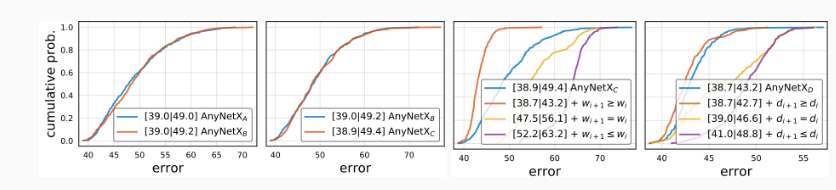

# 8.8.3. RegNet
Kết quả $\text{AnyNetX}_E$ không gian thiết kế bao gồm các mạng đơn giản tuân theo các nguyên tắc thiết kế dễ hiểu:

- Chia sẻ tỷ lệ cổ chai $k_i = k$ cho tất cả các giai đoạn $i$;

- Chia sẻ chiều rộng nhóm $g_i = g$ cho tất cả các giai đoạn $i$;

- Tăng độ rộng mạng qua các giai đoạn:$c_{i} \leq c_{i+1}$;

- Tăng độ sâu mạng qua các giai đoạn:$d_{i} \leq d_{i+1}$.

Điều này để lại cho chúng tôi tập hợp các lựa chọn cuối cùng: cách chọn các giá trị cụ thể cho các tham số trên của kết quả cuối cùng $\text{AnyNetX}_E$ không gian thiết kế. Bằng cách nghiên cứu các mạng hoạt động tốt nhất từ ​​sự phân phối ở $\text{AnyNetX}_E$ người ta có thể quan sát thấy rằng: độ rộng của mạng tăng tuyến tính một cách lý tưởng với chỉ số khối trên toàn mạng, nghĩa là, $c_j \approx c_0 + c_a j$, Ở đây $j$ là chỉ số khối và độ dốc $c_a > 0$. Cho rằng chúng ta chỉ có thể chọn chiều rộng khối khác nhau cho mỗi giai đoạn, chúng ta đi đến một hàm hằng số từng phần, được thiết kế để phù hợp với sự phụ thuộc này. Thứ hai, các thí nghiệm cũng chỉ ra rằng tỷ lệ thắt cổ chai của $k = 1$ hoạt động tốt nhất, nghĩa là chúng tôi được khuyên không nên sử dụng nút cổ chai.

Chúng tôi khuyên người đọc quan tâm nên xem lại các chi tiết khác về cách thiết kế các mạng cụ thể cho các lượng tính toán khác nhau bằng cách đọc qua Radosavovic et al. ( 2020 ) . Chẳng hạn, một biến thể RegNetX 32 lớp hiệu quả được đưa ra bởi $k = 1$ (không có nút thắt cổ chai), $g = 16$ (độ rộng nhóm là 16), $c_1 = 32$ Và $c_2 = 80$ các kênh cho giai đoạn thứ nhất và thứ hai, tương ứng, được chọn là $d_1=4$ Và $d_2=6$ khối sâu. Cái nhìn sâu sắc đáng kinh ngạc từ thiết kế là nó được áp dụng, ngay cả khi điều tra các mạng ở quy mô lớn hơn. Thậm chí tốt hơn, nó thậm chí còn phù hợp với các thiết kế mạng Bóp và Kích thích (SE) (RegNetY) có kích hoạt kênh toàn cầu ( Hu et al. , 2018 ) .

In [6]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

Chúng ta có thể thấy rằng mỗi giai đoạn RegNetX giảm dần độ phân giải và tăng các kênh đầu ra.

In [7]:
RegNetX32().layer_summary((1, 1, 96, 96))

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


#8.8.4. Training
Đào tạo RegNetX 32 lớp trên bộ dữ liệu Fashion-MNIST giống như trước đây.

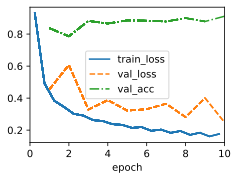

In [8]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)